In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
property1 = pd.read_csv('house_rent.csv')

In [ ]:
# Displaying the first 5 records

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale
0,0,FLAT,Island,3,3,4,"8,000,000",RENT
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT


In [ ]:
property1.shape

(8400, 8)

In [ ]:
property1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8400 non-null   int64 
 1   house-types  8400 non-null   object
 2   location     8400 non-null   object
 3   bedrooms     8400 non-null   object
 4   bathrooms    8400 non-null   object
 5   toilets      8400 non-null   object
 6   price        8400 non-null   object
 7   rent / sale  8400 non-null   object
dtypes: int64(1), object(7)
memory usage: 525.1+ KB


In [ ]:
property1.columns

Index(['Unnamed: 0', 'house-types', 'location', 'bedrooms', 'bathrooms',
       'toilets', 'price', 'rent / sale'],
      dtype='object')


```
```
# <h2> Cleaning The Dataset </h2>``
<h3> - Getting unique values per attribute</h3>
```

In [ ]:
print('House Types: ', property1['house-types'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', property1['location'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedrooms'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['bathrooms'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['toilets'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['FLAT ' 'TERRACED DUPLEX' 'HOUSE FOR' 'MINI FLAT' 'BLOCKS OF'
 'DETACHED DUPLEX' 'COMMERCIAL PROPERTY' 'SEMI DETACHED' 'DUPLEX HOUSE'
 'PENTHOUSE FLAT' 'OFFICE SPACE' 'FOR RENT' 'RENT' 'BOYS QUARTERS'
 'PROPERTY FOR' 'LAND FOR' 'MASSIONETTE HOUSE' 'LAND LAND' 'FLATS HOUSE'
 'DETACHED BUNGALOW' 'SHARED APARTMENT' 'SELF CONTAIN' 'APARTMENT FOR'
 'HOTELGUEST HOUSE' ' APARTMENT' 'A MALL' 'TERRACED BUNGALOW' 'CO WORKING'
 'WORKING SPACE' 'FACTORY COMMERCIAL' 'SHOW ROOM' 'STUDIO APARTMENT'
 'SPACE FOR' 'DUPLEX FOR' 'BLOCK OF' 'TERRACE FOR' 'SHOP IN'
 'CONFERENCE ROOM' 'EVENT CENTRE' 'SHOP COMMERCIAL'] 

---------------------------------------------
Location:  ['Island' 'Ikoyi' 'Ikeja' 'Lekki' 'Ojodu' 'Isolo' 'Ikosi' 'RoadIkoyi'
 'Maryland' 'Ikorodu' 'Right.Lekki' 'gateLekki' 'Ilupeju' 'Gbagada'
 'RouteLekki' 'Ajah' 'TollgateLekki' 'Surulere' 'Mushin' 'roadIkoyi'
 'LagosLekki' '2' 'Ipaja' 'Yaba' 'Sangotedo' 'GRAIkeja' 'Ogudu'
 'roadLekki' 'Okota' 'Egba' 'Odofin' 'RoadLekki' 'Ma

<h3> - Getting Value Counts Per Attribute </h3>

In [ ]:
print('House Types: ', property1['house-types'].value_counts(), '\n')
print('---------------------------------------------')
print('Location: ', property1['location'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedrooms'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['toilets'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['price'].value_counts(), '\n')
print('---------------------------------------------')
print('Status: ', property1['rent / sale'].value_counts(), '\n')

House Types:  FLAT                   2969
MINI FLAT              1375
TERRACED DUPLEX         665
DETACHED DUPLEX         571
SEMI DETACHED           545
BLOCKS OF               439
HOUSE FOR               319
COMMERCIAL PROPERTY     263
APARTMENT FOR           177
PROPERTY FOR            166
SHARED APARTMENT        132
PENTHOUSE FLAT          130
SELF CONTAIN             95
OFFICE SPACE             93
FOR RENT                 87
LAND FOR                 60
MASSIONETTE HOUSE        52
FLATS HOUSE              50
RENT                     48
DUPLEX HOUSE             27
DETACHED BUNGALOW        26
A MALL                   25
LAND LAND                18
BOYS QUARTERS            13
HOTELGUEST HOUSE         10
STUDIO APARTMENT          8
CO WORKING                7
BLOCK OF                  5
WORKING SPACE             4
SPACE FOR                 3
SHOP COMMERCIAL           3
SHOP IN                   3
DUPLEX FOR                2
TERRACED BUNGALOW         2
FACTORY COMMERCIAL        2
 APART

In [ ]:
#creating a function for the 'house type' attribute that converts all wrongly spelt features to NaN values

def type(x):
    
    if 'FLAT' in x:
        return 'Flat'
    
    elif 'TERRACED DUPLEX' in x:
        return 'Terraced Duplex'
    
    elif 'MINI FLAT' in x:
        return 'Mini Flat'
    
    elif 'DETACHED DUPLEX' in x:
        return 'Detached Duplex'
    
    elif 'SEMI DETACHED' in x:
        return 'Semi Detached Duplex'
    
    elif 'BLOCKS OF' in x:
        return 'Blocks of Flats'
    
    elif 'HOUSE FOR' in x:
        return 'Duplex'
    
    elif 'COMMERCIAL PROPERTY' in x:
        return 'Commercial Property'
    
    elif 'APARTMENT FOR' in x:
        return 'Flat'
    
    elif 'PROPERTY FOR' in x:
        return 'Commercial Property'
    
    elif 'SHARED APARTMENT' in x:
        return 'Shared Apartment'
    
    elif 'PENTHOUSE FLAT' in x:
        return 'Penthouse Flat'
    
    elif 'SELF CONTAIN' in x:
        return 'Self Contain'
    
    elif 'OFFICE SPACE' in x:
        return 'Office Space'
    
    elif 'LAND FOR' in x:
        return 'Land'
    
    elif 'MASSIONETTE HOUSE' in x:
        return 'Massionette House'
    
    elif 'FLATS HOUSE' in x:
        return 'Flats'
    
    elif 'DUPLEX HOUSE' in x:
        return 'Duplex'
    
    elif 'DETACHED BUNGALOW ' in x:
        return 'Detached Bungalow'
    
    elif 'A MALL' in x:
        return 'Shop(In Mall)'
    
    elif 'LAND LAND' in x:
        return 'Land'
    
    elif 'BOYS QUARTERS' in x:
        return 'Boys Quarters'
    
    elif 'HOTELGUEST HOUSE' in x:
        return 'Hotel Guest House'
    
    elif 'STUDIO APARTMENT' in x:
        return 'Studio Apartment'
        
    elif 'CO WORKING' in x:
        return 'Co Working Space'
    
    elif 'BLOCK OF' in x:
        return 'Blocks of Flats'
    
    elif 'WORKING SPACE' in x:
        return 'Co Working Space'
    
    elif 'SPACE FOR' in x:
        return 'Office Space'
    
    elif 'SHOP COMMERCIAL' in x:
        return 'Shop'
    
    elif 'SHOP IN' in x:
        return 'Shop(In Mall)'
    
    elif ' APARTMENT' in x:
        return 'Flat'
    
    elif 'TERRACED BUNGALOW' in x:
        return 'Terraced Bungalow'
    
    elif 'DUPLEX FOR' in x:
        return 'Duplex'
    
    elif 'FACTORY COMMERCIAL' in x:
        return 'Factory'
      
    elif 'FOR RENT' in x:
        return 'Flat'
      
    elif 'RENT' in x:
        return 'Flat'
    
    elif 'SHOW ROOM' in x:
        return 'Show Room'
    
    elif 'TERRACE FOR' in x:
        return 'Terraced Duplex'
    
    elif 'CONFERENCE ROOM' in x:
        return 'Conference Room'
    
    elif 'EVENT CENTRE' in x:
        return 'Event Centre'
    
    else:
        return 'NaN'
    
   

In [ ]:
#creating a new attribute for "house types"

property1["house-type"] = property1["house-types"].apply(type)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type
0,0,FLAT,Island,3,3,4,"8,000,000",RENT,Flat
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT,Flat
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT,Flat
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT,Flat
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT,Terraced Duplex


In [ ]:
#confirming the features and attributes are rightly generated

property1["house-type"].value_counts()

Flat                    4838
Terraced Duplex          666
Detached Duplex          571
Semi Detached Duplex     545
Blocks of Flats          444
Commercial Property      429
Duplex                   348
Shared Apartment         132
Office Space              96
Self Contain              95
Land                      78
Massionette House         52
Shop(In Mall)             28
NaN                       26
Boys Quarters             13
Co Working Space          11
Hotel Guest House         10
Studio Apartment           8
Shop                       3
Factory                    2
Terraced Bungalow          2
Conference Room            1
Show Room                  1
Event Centre               1
Name: house-type, dtype: int64

In [ ]:
#creating a function for the 'location' attribute that converts all wrongly spelt features to NaN values

def locations(x):
    
    if 'Island' in x:
        return 'Victoria Island'
    
    elif 'Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'Ikeja' in x:
        return 'Ikeja'
    
    elif 'Lekki' in x:
        return 'Lekki'
    
    elif 'Ojodu' in x:
        return 'Ojodu'
    
    elif 'Isolo' in x:
        return 'Isolo'
    
    elif 'Ikosi' in x:
        return 'Ikosi'
    
    elif 'RoadIkoyi' in x:
        return 'Ikoyi'
    
    elif 'Maryland' in x:
        return 'Maryland'
    
    elif 'Ikorodu' in x:
        return 'Ikorodu'
    
    elif 'Right.Lekki' in x:
        return 'Lekki'
    
    elif 'gateLekki' in x:
        return 'Lekki'
    
    elif 'Ilupeju' in x:
        return 'Ilupeju'
    
    elif 'Gbagada' in x:
        return 'Gbagada'
    
    elif 'RouteLekki' in x:
        return 'Lekki'
    
    elif 'Ajah' in x:
        return 'Ajah'
    
    elif 'TollgateLekki' in x:
        return 'Lekki'
    
    elif 'Surulere' in x:
        return 'Surulere'
    
    elif 'Mushin ' in x:
        return 'Mushin'
    
    elif 'roadIkoyi' in x:
        return 'Ikoyi'
    
    elif 'LagosLekki' in x:
        return 'Lekki'
    
    elif 'Ipaja' in x:
        return 'Ipaja'
    
    elif 'Yaba' in x:
        return 'Yaba'
    
    elif 'Sangotedo' in x:
        return 'Sangotedo'
        
    elif 'GRAIkeja' in x:
        return 'Ikeja'
    
    elif 'Ogudu' in x:
        return 'Ogudu'
    
    elif 'roadLekki' in x:
        return 'Lekki'
    
    elif 'Okota' in x:
        return 'Okota'
    
    elif 'Egba' in x:
        return 'Egba'
    
    elif 'Odofin' in x:
        return 'Odofin'
    
    elif 'RoadLekki' in x:
        return 'Lekki'
    
    elif 'MarylandMaryland' in x:
        return 'Maryland'
    
    elif 'Ejigbo' in x:
        return 'Ejigbo'
    
    elif 'Oshodi' in x:
        return 'Oshodi'
    
    elif 'Ogba' in x:
        return 'Ogba'
    
    elif 'Shomolu' in x:
        return 'Shomolu'
    
    elif 'Alimosho' in x:
        return 'Alimosho'
    
    elif 'Lagos.Yaba' in x:
        return 'Yaba'
    
    elif 'Agege' in x:
        return 'Agege'
    
    elif 'OGUDUOgudu' in x:
        return 'Ogudu'
    
    elif 'IkoyiIkoyi' in x:
        return 'Ikoyi'
    
    elif 'orchidLekki' in x:
        return 'Lekki'
    
    elif 'elegushiLekki' in x:
        return 'Lekki'
    
    elif 'mallSangotedo' in x:
        return 'Sangotedo'
    
    elif 'lekkiLekki' in x:
        return 'Lekki'
    
    elif 'DriveLekki' in x:
        return 'Lekki'
    
    elif 'Igando' in x:
        return 'Igando'
    
    elif 'Road.Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'RightLekki' in x:
        return 'Lekki'
    
    elif 'AxisLekki' in x:
        return 'Lekki'
    
    elif 'Camp' in x:
        return 'Camp'
    
    elif 'OLekki' in x:
        return 'Lekki'
    
    elif 'OrchidLekki' in x:
        return 'Lekki'
    
    elif 'IkateLekki' in x:
        return 'Lekki'
    
    elif '...Lekki' in x:
        return 'Lekki'
    
    elif 'estateLekki' in x:
        return 'Lekki'
    
    elif 'AnthonyMaryland' in x:
        return 'Maryland'
    
    elif 'estateAjah ' in x:
        return 'Ajah'
    
    elif '...Ikoyi' in x:
        return 'Ikoyi'
    
    elif '-Ikeja' in x:
        return 'Ikeja'
    
    elif 'streetIkeja' in x:
        return 'Ikeja'
    
    elif 'Apapa' in x:
        return 'Apapa'
    
    elif 'Ojota' in x:
        return 'Ojota'
    
    elif 'IPAJAIpaja' in x:
        return 'Ipaja'
    
    elif 'StreetGbagada' in x:
        return 'Gbagada'
    
    elif 'ChevronLekki' in x:
        return 'Lekki'
    
    elif 'GTBankGbagada' in x:
        return 'Gbagada'
    
    elif 'LondonLekki' in x:
        return 'Lekki'
    
    elif 'AreaOjodu' in x:
        return 'Ojodu'
    
    elif 'LekkiLekki' in x:
        return 'Lekki'
    
    elif 'Idimu' in x:
        return 'Idimu'
    
    elif 'wayIsolo' in x:
        return 'Isolo'
    
    elif 'VGCLekki' in x:
        return 'Lekki'
    
    elif 'courtLekki' in x:
        return 'Lekki'
    
    elif 'streetSurulere' in x:
        return 'Surulere'
    
    elif 'kayIkorodu' in x:
        return 'Ikorodu'
    
    elif 'road.Ajah' in x:
        return 'Ajah'
    
    elif 'roadIlupeju' in x:
        return 'Ilupeju'
    
    elif 'roadKetu' in x:
        return 'Ketu'
    
    elif 'OneSangotedo' in x:
        return 'Sangotedo'
    
    elif 'ObawoleIju' in x:
        return 'Iju'
    
    elif 'HotelOgba' in x:
        return 'Ogba'
    
    elif 'paradiseLekki' in x:
        return 'Lekki'
    
    elif '2Ajah' in x:
        return 'Ajah'
    
    elif 'Gbagada.Gbagada' in x:
        return 'Gbagada'
    
    elif '101233Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'SchoolAjah' in x:
        return 'Ajah'
    
    elif 'SurulereSurulere' in x:
        return 'Surulere'
    
    elif 'AKERELESurulere' in x:
        return 'Surulere'
    
    elif 'EstateLekki' in x:
        return 'Lekki'
    
    elif 'Abule-EgbaAgege' in x:
        return 'Agege'
    
    elif 'OgbaIju' in x:
        return 'Iju'
    
    elif 'AgungiLekki' in x:
        return 'Lekki'
    
    elif 'AlapereKetu' in x:
        return 'Ketu'
    
    elif '1Lekki' in x:
        return 'Lekki'
    
    elif 'shomoluShomolu' in x:
        return 'Shomolu'
    
    elif '...Ogudu' in x:
        return 'Ogudu'
    
    elif '(LBS)Ajah' in x:
        return 'Ajah'
    
    elif 'EstateOkota' in x:
        return 'Okota'
    
    elif 'EstateIkeja' in x:
        return 'Ikeja'
    
    elif 'AptechAjah' in x:
        return 'Ajah'
    
    elif 'ilupejuYaba' in x:
        return 'Yaba'
    
    elif 'Badagry' in x:
        return 'Badagry'
    
    elif 'areaIsolo' in x:
        return 'Isolo'
    
    elif 'RoadAjah' in x:
        return 'Ajah'
    
    elif '...Ogba' in x:
        return 'Ogba'
    
    elif 'IlupejuIlupeju' in x:
        return 'Ilupeju'
    
    elif 'OnikeYaba' in x:
        return 'Yaba'
    
    elif 'IkejaMaryland' in x:
        return 'Maryland'
    
    elif 'areaYaba' in x:
        return 'Yaba'
    
    elif 'ijeshaYaba' in x:
        return 'Yaba'
    
    elif '...Ipaja' in x:
        return 'Ipaja'
    
    elif 'areaEjigbo' in x:
        return 'Ejigbo'
    
    elif 'Yaba.Yaba' in x:
        return 'Yaba'
    
    elif 'estateIsolo' in x:
        return 'Isolo'
    
    elif '-----Alimosho' in x:
        return 'Alimosho'
    
    elif 'YabaYaba' in x:
        return 'Yaba'
    
    elif 'isoloIsolo' in x:
        return 'Isolo'
    
    elif 'bustopIsolo' in x:
        return 'Isolo'
    
    elif 'MainlandIsolo' in x:
        return 'Isolo'
    
    elif '-Gbagada' in x:
        return 'Gbagada'
    
    elif 'DriveIkoyi' in x:
        return 'Ikoyi'
    
    elif 'G.R.Yaba' in x:
        return 'Yaba'
    
    elif '2Ikeja' in x:
        return 'Ikeja'
    
    elif '1Ikeja' in x:
        return 'Ikeja'
    
    elif 'Avenue' in x:
        return 'Ikoyi'
    
    elif 'Oniru' in x:
        return 'Victoria Island'
    
    elif 'isheriOjodu' in x:
        return 'Ojodu'
    
    elif 'schoolOjodu' in x:
        return 'Ojodu'
    
    elif 'OniriLekki' in x:
        return 'Lekki'
    
    elif '-Yaba' in x:
        return 'Yaba'
    
    elif 'StreetIkoyi' in x:
        return 'Ikoyi'
    
    elif 'EstateIkoyi' in x:
        return 'Ikoyi'
    
    elif 'Omorinre' in x:
        return 'Lekki'
    
    elif 'Babs' in x:
        return 'Surulere'
    
    elif 'Alaka' in x:
        return 'Surulere'
    
    elif 'Bourdillon' in x:
        return 'Ikoyi'
    
    elif 'GraIkeka' in x:
        return 'Ikeja'
    
    elif 'EstateGbagada' in x:
        return 'Gbagada'
    
    elif 'ThomasSurulere' in x:
        return 'Surulere'
    
    elif 'ShangishaIkeja' in x:
        return 'Ikeja'
    
    elif 'BajulaiyeShomolu' in x:
        return 'Shomolu'
    
    elif 'IdadoLekki' in x:
        return 'Lekki'
    
    elif 'Iju' in x:
        return 'Iju'
    
    elif 'Ketu' in x:
        return 'Ketu'
    
    elif 'IteleIpaja' in x:
        return 'Ipaja'
    
    elif 'ShomoluShomolu' in x:
        return 'Shomolu'
    
    elif 'ketuKetu' in x:
        return 'Ketu'
    
    elif 'PALACEIsolo' in x:
        return 'Isolo'
    
    elif 'CloseIkeja' in x:
        return 'Ikeja'
    
    elif '(Lekki)Lekki' in x:
        return 'Lekki'
    
    elif 'EstateOjodu' in x:
        return 'Ojodu'
    
    elif 'bustopIju' in x:
        return 'Iju'
    
    elif 'EstateApapa' in x:
        return 'Apapa'
    
    elif 'GardenLekki' in x:
        return 'Lekki'
    
    elif 'EstateIsolo' in x:
        return 'Isolo'
    
    elif 'mosanIpaja' in x:
        return 'Ipaja'
    
    elif 'wayYaba' in x:
        return 'Yaba'
    
    elif 'EstateOgba' in x:
        return 'Ogba'
    
    elif 'Ojo' in x:
        return 'Ojo'
    
    elif 'MShomolu' in x:
        return 'Shomolu'
    
    elif 'CrescentApapa' in x:
        return 'Apapa'
    
    elif 'roadOgba' in x:
        return 'Ogba'
    
    elif 'WayIkoyi' in x:
        return 'Ikoyi'
    
    elif '...Gbagada' in x:
        return 'Gbagada'
    
    elif 'estateIlupeju' in x:
        return 'Ilupeju'
    
    elif 'OlogoloLekki' in x:
        return 'Lekki'
    
    elif 'wayLekki' in x:
        return 'Lekki'
    
    elif 'CountyLekki' in x:
        return 'Lekki'
    
    elif 'WayLekki' in x:
        return 'Lekki'
    
    elif 'EleganzaLekki' in x:
        return 'Lekki'
    
    elif 'ElegushiLekki' in x:
        return 'Lekki'
    
    elif 'AjahLekki' in x:
        return 'Ajah'
    
    elif 'StreetIkeja' in x:
        return 'Ikeja'
    
    elif 'AmusaLekki' in x:
        return 'Lekki'
    
    elif 'chevronLekki' in x:
        return 'Lekki'
    
    elif 'DriveSurulere' in x:
        return 'Surulere'
    
    elif 'OsborneIkoyi' in x:
        return 'Ikoyi'
    
    elif '.Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'rdIkoyi' in x:
        return 'Ikoyi'
    
    elif 'gloverIkoyi' in x:
        return 'Ikoyi'
    
    elif 'avenueIkoyi' in x:
        return 'Ikoyi'
    
    elif 'AlexandraIkoyi' in x:
        return 'Ikoyi'
    
    elif 'AlexanderIkoyi' in x:
        return 'Ikoyi'
    
    elif 'estateIkoyi' in x:
        return 'Ikoyi'
    
    elif 'WaterfrontIkoyi' in x:
        return 'Ikoyi'
    
    elif 'highbrowIkoyi' in x:
        return 'Ikoyi'
    
    elif 'RDIkoyi' in x:
        return 'Ikoyi'
    
    elif 'streetLekki' in x:
        return 'Lekki'
    
    elif 'ROADIkoyi' in x:
        return 'Ikoyi'
    
    elif '...Maryland' in x:
        return 'Maryland'
    
    elif 'LagosIkoyi' in x:
        return 'Ikoyi'
    
    elif 'IfakoGbagada' in x:
        return 'Gbagada'
    
    elif 'boyGbagada' in x:
        return 'Gbagada'
    
    elif 'LagosIlupeju' in x:
        return 'Ilupeju'
    
    elif 'AdemolaIkoyi' in x:
        return 'Ikoyi'
    
    elif 'rdGbagada' in x:
        return 'Gbagada'
    
    elif 'ojoduOjodu' in x:
        return 'Ojodu'
    
    elif 'EstateAjah' in x:
        return 'Ajah'
    
    elif 'ikejaIkeja' in x:
        return 'Ikeja'
    
    elif '...Shomolu' in x:
        return 'Shomolu'
    
    elif '...Isolo' in x:
        return 'Isolo'
    
    elif '...Ojodu' in x:
        return 'Ojodu'
    
    elif 'homesLekki' in x:
        return 'Lekki'
    
    elif '....Ajah' in x:
        return 'Ajah'
    
    elif 'Orile' in x:
        return 'Agege'
    
    elif 'AdetolaSurulere' in x:
        return 'Surulere'
    
    elif 'AjuwonIju' in x:
        return 'Iju'
    
    elif '...Ajah' in x:
        return 'Ajah'
    
    elif 'ajahAjah' in x:
        return 'Ajah'
    
    elif 'OwodeAjah' in x:
        return 'Ajah'
    
    elif 'streetOgba' in x:
        return 'Ogba'
    
    elif 'IshagaIju' in x:
        return 'Iju'
    
    elif 'gardenAjah' in x:
        return 'Ajah'
    
    elif 'IjuIju' in x:
        return 'Iju'
    
    elif 'estateOkota' in x:
        return 'Okota'
    
    elif 'lacShomolu' in x:
        return 'Shomolu'
    
    elif '-Shomolu' in x:
        return 'Shomolu'
    
    elif 'ogbaIju' in x:
        return 'Ogba'
    
    elif '...Yaba' in x:
        return 'Yaba'
    
    elif 'str.Ojodu' in x:
        return 'Ojodu'
    
    elif 'GRAIkorodu' in x:
        return 'Ikorodu'
    
    elif 'OroSurulere' in x:
        return 'Surulere'
    
    elif 'AdelabuSurulere' in x:
        return 'Surulere'
    
    elif 'obawoleIju' in x:
        return 'Iju'
    
    elif 'StateIju' in x:
        return 'Iju'
    
    elif 'EstateMarylandi' in x:
        return 'Maryland'
    
    elif 'stopLekki' in x:
        return 'Lekki'
    
    elif 'avenueOgba' in x:
        return 'Ogba'
    
    elif 'OGBAOgba' in x:
        return 'Ogba'
    
    elif '-Lekki' in x:
        return 'Lekki'
    
    elif 'AbijoSangotedo' in x:
        return 'Sangotedo'
    
    elif 'AkiodeOjodu' in x:
        return 'Ojodu'
    
    elif 'RoadIju' in x:
        return 'Ogba'
    
    elif 'LEKKILekki' in x:
        return 'Lekki'
    
    elif 'AREA........Ojodu' in x:
        return 'Ojodu'
    
    elif 'roadYaba' in x:
        return 'Yaba'
    
    elif 'RoadShomolu' in x:
        return 'Shomolu'
    
    elif 'Iju-IshagaIju' in x:
        return 'Iju'
    
    elif 'admiraltyLekki' in x:
        return 'Lekki'
    
    elif '2Ojodu' in x:
        return 'Ojodu'
    
    elif 'estateGbagada' in x:
        return 'Gbagada'
    
    elif 'lakShomolu' in x:
        return 'Shomolu'
    
    elif 'sideLEKKI' in x:
        return 'Lekki'
    
    elif 'streetMushin' in x:
        return 'Mushin'
    
    elif 'SalmLekki' in x:
        return 'Lekki'
    
    elif 'B/stopMushin' in x:
        return 'Mushin'
    
    elif 'bankoleSurulere' in x:
        return 'Mushin'
    
    elif 'roadShomolu' in x:
        return 'Mushin'
    
    else:
        return 'NaN'
    
   

In [ ]:
#creating a new attribute for "location"

property1["locations"] = property1["location"].apply(locations)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations
0,0,FLAT,Island,3,3,4,"8,000,000",RENT,Flat,Victoria Island
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT,Flat,Ikoyi
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT,Flat,Ikeja
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT,Flat,Lekki
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT,Terraced Duplex,Ikoyi


In [ ]:
property1["locations"].value_counts()

Lekki              2293
Ikoyi              1189
Victoria Island     694
Ikeja               493
Ajah                469
Yaba                377
Gbagada             363
Ojodu               328
Surulere            244
Ogba                222
Ikosi               200
Shomolu             162
Odofin              154
Okota               145
Maryland            128
Ogudu               121
Ipaja               117
Isolo               116
Ikorodu             108
Alimosho             97
Egba                 66
Igando               55
Ilupeju              48
Agege                37
Sangotedo            34
NaN                  32
Apapa                17
Oshodi               17
Camp                 16
Iju                  15
Idimu                13
Ojota                12
Ketu                 10
Ejigbo                3
Badagry               2
Mushin                2
Ojo                   1
Name: locations, dtype: int64

In [ ]:
#creating a function that converts all non numerical values to NaN values for the attribute name "bedroom"

def bed(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [ ]:
#creating a new attribute that contains all bedroom instances to be numerical and NaN

property1["bedroom"] = property1["bedrooms"].apply(bed)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom
0,0,FLAT,Island,3,3,4,"8,000,000",RENT,Flat,Victoria Island,3
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT,Flat,Ikoyi,3
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT,Flat,Ikeja,3
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT,Flat,Lekki,3
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT,Terraced Duplex,Ikoyi,4


In [ ]:
#creating a function that converts all non numerical values to NaN values for the attribute name "bathroom"

def bath(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [ ]:
#creating a new attribute that contains all bathroom instances to be numerical and NaN

property1["bathroom"] = property1["bathrooms"].apply(bath)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom,bathroom
0,0,FLAT,Island,3,3,4,"8,000,000",RENT,Flat,Victoria Island,3,3
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT,Flat,Ikoyi,3,3
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT,Flat,Ikeja,3,3
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT,Flat,Lekki,3,3
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT,Terraced Duplex,Ikoyi,4,4


In [ ]:
#creating a function that converts all non numerical values to NaN values for the attribute name "toilet"

def toil(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [ ]:
#creating a new attribute that contains all toilet instances to be numerical and NaN

property1["toilet"] = property1["toilets"].apply(toil)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom,bathroom,toilet
0,0,FLAT,Island,3,3,4,"8,000,000",RENT,Flat,Victoria Island,3,3,4
1,1,FLAT,Ikoyi,3,3,4,"12,000,000",RENT,Flat,Ikoyi,3,3,4
2,2,FLAT,Ikeja,3,3,4,"2,000,000",RENT,Flat,Ikeja,3,3,4
3,3,FLAT,Lekki,3,3,4,"3,500,000",RENT,Flat,Lekki,3,3,4
4,4,TERRACED DUPLEX,Ikoyi,4,4,5,"13,000,000",RENT,Terraced Duplex,Ikoyi,4,4,5


In [ ]:
#Dropping the unwanted variables

property1.drop(['Unnamed: 0','house-types', 'location', 'bedrooms', 'bathrooms','toilets', 'rent / sale'], axis=1, inplace=True)

In [ ]:
property1.head()

,price,house-type,locations,bedroom,bathroom,toilet
0,"8,000,000",Flat,Victoria Island,3,3,4
1,"12,000,000",Flat,Ikoyi,3,3,4
2,"2,000,000",Flat,Ikeja,3,3,4
3,"3,500,000",Flat,Lekki,3,3,4
4,"13,000,000",Terraced Duplex,Ikoyi,4,4,5


<h2> Sorting Missing Values </h2>

In [ ]:
print('House Types: ', property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['toilet'].unique(), '\n')
print('---------------------------------------------')

House Types:  ['Flat' 'Terraced Duplex' 'Duplex' 'Blocks of Flats' 'Detached Duplex'
 'Commercial Property' 'Semi Detached Duplex' 'Office Space'
 'Boys Quarters' 'Land' 'Massionette House' 'NaN' 'Shared Apartment'
 'Self Contain' 'Hotel Guest House' 'Shop(In Mall)' 'Terraced Bungalow'
 'Co Working Space' 'Factory' 'Show Room' 'Studio Apartment'
 'Conference Room' 'Event Centre' 'Shop'] 

---------------------------------------------
Location:  ['Victoria Island' 'Ikoyi' 'Ikeja' 'Lekki' 'Ojodu' 'Isolo' 'Ikosi'
 'Maryland' 'Ikorodu' 'Ilupeju' 'Gbagada' 'Ajah' 'Surulere' 'NaN' 'Ipaja'
 'Yaba' 'Sangotedo' 'Ogudu' 'Okota' 'Egba' 'Odofin' 'Ejigbo' 'Oshodi'
 'Ogba' 'Shomolu' 'Alimosho' 'Agege' 'Igando' 'Camp' 'Apapa' 'Ojota'
 'Idimu' 'Ketu' 'Iju' 'Badagry' 'Ojo' 'Mushin'] 

---------------------------------------------
Number of Bedrooms:  ['3' '4' '1' '5' 'NaN' '2' '6' '7' '9' '8'] 

---------------------------------------------
Number of Bathrooms:  ['3' '4' '1' '5' 'NaN' '2' '6' '7' '9' '

In [ ]:
#replacing the missing values ('NaN') with 'np.NaN' and saving with a new name

new_property1 = property1.replace('NaN', np.nan)

In [ ]:
print('House Types: ', new_property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', new_property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', new_property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', new_property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', new_property1['toilet'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['Flat' 'Terraced Duplex' 'Duplex' 'Blocks of Flats' 'Detached Duplex'
 'Commercial Property' 'Semi Detached Duplex' 'Office Space'
 'Boys Quarters' 'Land' 'Massionette House' nan 'Shared Apartment'
 'Self Contain' 'Hotel Guest House' 'Shop(In Mall)' 'Terraced Bungalow'
 'Co Working Space' 'Factory' 'Show Room' 'Studio Apartment'
 'Conference Room' 'Event Centre' 'Shop'] 

---------------------------------------------
Location:  ['Victoria Island' 'Ikoyi' 'Ikeja' 'Lekki' 'Ojodu' 'Isolo' 'Ikosi'
 'Maryland' 'Ikorodu' 'Ilupeju' 'Gbagada' 'Ajah' 'Surulere' nan 'Ipaja'
 'Yaba' 'Sangotedo' 'Ogudu' 'Okota' 'Egba' 'Odofin' 'Ejigbo' 'Oshodi'
 'Ogba' 'Shomolu' 'Alimosho' 'Agege' 'Igando' 'Camp' 'Apapa' 'Ojota'
 'Idimu' 'Ketu' 'Iju' 'Badagry' 'Ojo' 'Mushin'] 

---------------------------------------------
Number of Bedrooms:  ['3' '4' '1' '5' nan '2' '6' '7' '9' '8'] 

---------------------------------------------
Number of Bathrooms:  ['3' '4' '1' '5' nan '2' '6' '7' '9' '8'] 

--

In [ ]:
#converting the dataset to a numpy array
new_property1 = new_property1.to_numpy()

In [ ]:
clean_property1 = new_property1


In [ ]:
clean_property1 = pd.DataFrame(data=clean_property1, columns=property1.columns)

In [ ]:
clean_property1.head(50)

,price,house-type,locations,bedroom,bathroom,toilet
0,"8,000,000",Flat,Victoria Island,3,3,4
1,"12,000,000",Flat,Ikoyi,3,3,4
2,"2,000,000",Flat,Ikeja,3,3,4
3,"3,500,000",Flat,Lekki,3,3,4
4,"13,000,000",Terraced Duplex,Ikoyi,4,4,5
5,"5,000,000",Duplex,Lekki,4,4,5
6,"3,000,000",Flat,Lekki,3,3,4
7,"700,000",Flat,Ojodu,1,1,2
8,"1,200,000",Blocks of Flats,Isolo,3,3,4
9,"65,000,000",Terraced Duplex,Lekki,5,5,6


In [ ]:
clean_property1.to_csv("Cleaned_Rent.csv")

In [ ]:
print('House Types: ', clean_property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', clean_property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', clean_property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', clean_property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', clean_property1['toilet'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['Detached Duplex' 'Flat' 'Terraced Duplex' 'Semi Detached Duplex'
 'Blocks of Flats' 'Massionette House' nan 'Duplex' 'Terraced Bungalow'
 'Self Contain'] 

---------------------------------------------
Location:  ['Lekki' 'Ikoyi' 'Isolo' 'Ajah' 'Ilupeju' 'Victoria Island' 'Ikeja'
 'Ojodu' nan 'Gbagada' 'Maryland' 'Surulere' 'Ogba' 'Ketu' 'Egba' 'Yaba'
 'Sangotedo' 'Odofin' 'Ejigbo' 'Iju' 'Ipaja' 'Alimosho' 'Ikosi' 'Ikorodu'
 'Igando' 'Camp' 'Ogudu' 'Shomolu' 'Idimu' 'Apapa' 'Okota' 'Agege' 'Ojo'
 'Ojota' 'Oshodi' 'Badagry'] 

---------------------------------------------
Number of Bedrooms:  ['4' '1' '2' '3' '5' '6' '7' nan '8' '9'] 

---------------------------------------------
Number of Bathrooms:  ['4' '1' '2' '5' '6' '3' nan '7' '8' '9'] 

---------------------------------------------
Number of Toilets:  ['5' '2' '3' '6' '4' nan '8' '7' '9' '1'] 

---------------------------------------------


In [ ]:
#Knowing the data type of each attribute

clean_property1.dtypes

price         object
house-type    object
locations     object
bedroom       object
bathroom      object
toilet        object
dtype: object


<h2> Exploratory Data Analysis </h2>
```


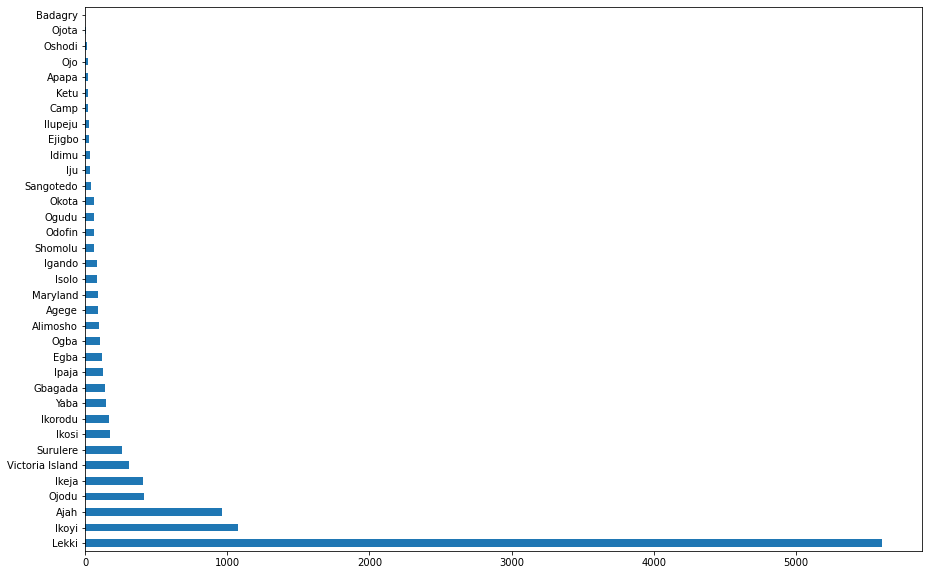

In [ ]:
clean_property1['locations'].value_counts().plot(kind='barh', figsize = (15, 10))

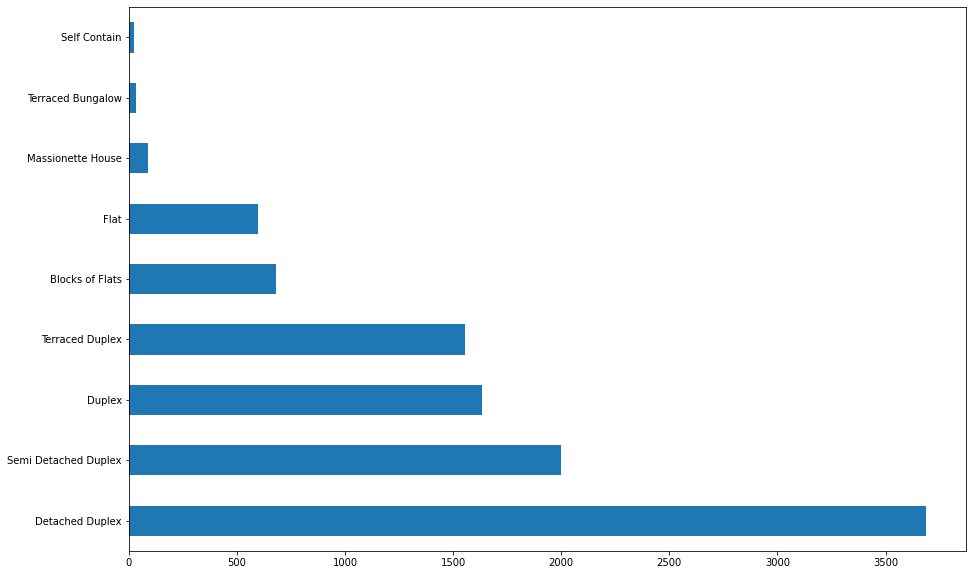

In [ ]:
clean_property1['house-type'].value_counts().plot(kind='barh', figsize = (15, 10))

In [ ]:
#making a copy of the original data to check for correlation between all attributes

clean_property1_copy = pd.DataFrame(data=clean_property1)

In [ ]:
clean_property1_copy.to_csv

<bound method NDFrame.to_csv of              price            house-type locations bedroom bathroom toilet
0       90,000,000       Detached Duplex     Lekki       4        4      5
1       25,000,000                  Flat     Lekki       1        1      2
2       55,000,000       Terraced Duplex     Lekki       4        4      5
3       45,000,000       Terraced Duplex     Lekki       4        4      5
4       35,000,000       Terraced Duplex     Lekki       2        2      3
...            ...                   ...       ...     ...      ...    ...
10995   60,000,000  Semi Detached Duplex     Lekki       4        4      5
10996  240,000,000  Semi Detached Duplex     Ikoyi       4        4      5
10997  150,000,000                Duplex  Surulere       4        4      5
10998   48,000,000  Semi Detached Duplex      Ajah       4        4      5
10999  125,000,000       Detached Duplex     Ojodu       5        5      6

[11000 rows x 6 columns]>

In [ ]:
#converting all attributes to numerical data 

for column in clean_property1_copy.columns:
    if clean_property1_copy[column].dtype == np.number:
        continue
    clean_property1_copy[column] = LabelEncoder().fit_transform(clean_property1_copy[column])

In [ ]:
clean_property1_copy

,price,house-type,locations,bedroom,bathroom,toilet
0,350,1,20,3,3,4
1,133,3,20,0,0,1
2,266,8,20,3,3,4
3,230,8,20,3,3,4
4,188,8,20,1,1,2
...,...,...,...,...,...,...
10995,281,6,20,3,3,4
10996,130,6,15,3,3,4
10997,65,2,32,3,3,4
10998,244,6,1,3,3,4


In [ ]:
clean_property1_copy.dtypes

price         int64
house-type    int64
locations     int64
bedroom       int64
bathroom      int64
toilet        int64
dtype: object

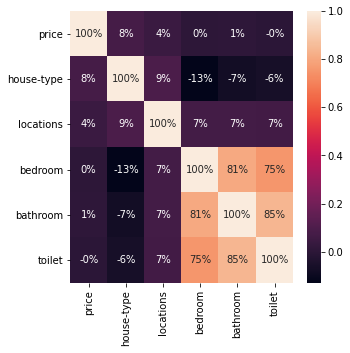

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(clean_property1_copy.corr(), annot=True, fmt='.0%')

In [ ]:
clean_property1.to_csv("clean_property1.csv")

In [ ]:
clean_property1 = pd.read_csv('clean_property1.csv')